<a href="https://colab.research.google.com/github/jbshirk/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/Joseph_Shirk_LS_DS_131_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Save to repo: DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments
> module1-statistics-probability-and-inference/

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
import pandas as pd

In [0]:
issues_exp = (
#class,# Name: 2 (democrat, republican)
'handicapped-infants'#: 2 (y,n)
,'water-project-cost-sharing'#: 2 (y,n)
,'adoption-of-the-budget-resolution'#: 2 (y,n)
,'physician-fee-freeze'#: 2 (y,n)
,'el-salvador-aid'#: 2 (y,n)
,'religious-groups-in-schools'#: 2 (y,n)
,'anti-satellite-test-ban'#: 2 (y,n)
,'aid-to-nicaraguan-contras'#: 2 (y,n)
,'mx-missile'#: 2 (y,n)
,'immigration'#: 2 (y,n)
,'synfuels-corporation-cutback'#: 2 (y,n)
,'education-spending'#: 2 (y,n)
,'superfund-right-to-sue'#: 2 (y,n)
,'crime'#: 2 (y,n)
,'duty-free-exports'#: 2 (y,n)
,'export-administration-act-south-africa'#: 2 (y,n)
)

In [3]:
issues_exp

('handicapped-infants',
 'water-project-cost-sharing',
 'adoption-of-the-budget-resolution',
 'physician-fee-freeze',
 'el-salvador-aid',
 'religious-groups-in-schools',
 'anti-satellite-test-ban',
 'aid-to-nicaraguan-contras',
 'mx-missile',
 'immigration',
 'synfuels-corporation-cutback',
 'education-spending',
 'superfund-right-to-sue',
 'crime',
 'duty-free-exports',
 'export-administration-act-south-africa')

In [4]:
issues = pd.DataFrame({'issue':issues_exp})
issues

,issue
0,handicapped-infants
1,water-project-cost-sharing
2,adoption-of-the-budget-resolution
3,physician-fee-freeze
4,el-salvador-aid
5,religious-groups-in-schools
6,anti-satellite-test-ban
7,aid-to-nicaraguan-contras
8,mx-missile
9,immigration


In [0]:
cols = ('party', '0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15')

In [0]:
csv = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',
               names=cols   )

In [7]:
csv.shape

(435, 17)

In [8]:
csv.sample(20)

,party,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
117,republican,y,y,y,y,y,n,y,n,n,n,n,y,y,y,n,y
209,democrat,y,y,y,n,n,n,y,y,y,y,y,n,n,n,n,y
249,democrat,y,n,y,n,n,n,y,y,?,n,y,n,n,n,y,y
85,democrat,n,n,y,n,y,y,n,n,n,y,y,y,y,y,n,y
120,republican,n,?,?,y,y,y,n,n,n,y,n,y,y,y,?,y
51,republican,n,y,n,y,y,y,n,?,n,n,n,y,y,y,n,y
156,republican,y,y,n,y,y,y,y,n,n,n,n,y,y,y,n,n
231,republican,n,y,n,y,y,y,n,n,y,y,n,y,y,y,n,y
68,democrat,y,?,y,n,n,n,y,y,y,n,n,n,y,n,y,y
399,republican,n,y,n,y,?,y,n,n,n,y,n,y,y,y,n,n


In [0]:
import numpy as np
def yea_nay(vote):
  if vote == 'y':return 1
  if vote == 'n':return -1
  if vote == '?':return 0
  else: return vote #ignore party

In [0]:
#csv.iloc[:,1:17].apply(lambda col: yea_nay(col))

In [0]:
#csv.apply(lambda col: yea_nay(col) if col.name != 'party' else col)

In [0]:
#csv[['0','1']].apply(yea_nay,axis=1)

In [20]:
csv.columns

Index(['party', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15'],
      dtype='object')

In [21]:
csv.columns.size-1

16

In [23]:
csv[csv.columns[-16:]].head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [24]:
csv[csv.columns[-16:]].applymap(lambda x: yea_nay(x)).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1,1,-1,1,1,1,-1,-1,-1,1,0,1,1,1,-1,1
1,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,0
2,0,1,1,0,1,1,-1,-1,-1,-1,1,-1,1,1,-1,-1
3,-1,1,1,-1,0,1,-1,-1,-1,-1,1,-1,1,-1,-1,1
4,1,1,1,-1,1,1,-1,-1,-1,-1,1,0,1,1,1,1


In [0]:
votes = csv

In [31]:
votes.head()

,party,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
votes[votes.columns[-16:]] = csv[csv.columns[-16:]].applymap(lambda x: yea_nay(x))

In [33]:
votes.head()

,party,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,republican,-1,1,-1,1,1,1,-1,-1,-1,1,0,1,1,1,-1,1
1,republican,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,0
2,democrat,0,1,1,0,1,1,-1,-1,-1,-1,1,-1,1,1,-1,-1
3,democrat,-1,1,1,-1,0,1,-1,-1,-1,-1,1,-1,1,-1,-1,1
4,democrat,1,1,1,-1,1,1,-1,-1,-1,-1,1,0,1,1,1,1


## 2 hypothesis testing, 
find an issue that democrats support more than republicans with p < 0.01

In [34]:
votes.describe(exclude='number')

,party
count,435
unique,2
top,democrat
freq,267


need to split into two df: rep and dem

In [0]:
dem = votes[votes['party'] == 'democrat']

In [0]:
dem = dem.drop(columns='party')

In [40]:
dem.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
2,0,1,1,0,1,1,-1,-1,-1,-1,1,-1,1,1,-1,-1
3,-1,1,1,-1,0,1,-1,-1,-1,-1,1,-1,1,-1,-1,1
4,1,1,1,-1,1,1,-1,-1,-1,-1,1,0,1,1,1,1
5,-1,1,1,-1,1,1,-1,-1,-1,-1,-1,-1,1,1,1,1
6,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,-1,0,1,1,1


In [0]:
rep = votes[votes['party'] =='republican']

In [0]:
rep = rep.drop(columns='party')

### spot relevant issues

In [0]:
#pd.merge( dem.mean(axis=0), rep.mean(axis=0) )

In [0]:
votes.T#.groupby('party').agg(np.mean)

In [73]:
#rel_issues
mean_dem_v_rep = votes.groupby(votes.party).agg(np.mean).T
mean_dem_v_rep['abs_mean_diff'] = abs(mean_dem_v_rep['democrat'] - mean_dem_v_rep['republican'])
mean_dem_v_rep.sort_values('abs_mean_diff',ascending=False).head(8) #choose top 8 extremes

party,democrat,republican,abs_mean_diff
3,-0.865169,0.958333,1.823502
2,0.756554,-0.714286,1.470840
4,-0.543071,0.886905,1.429976
11,-0.662921,0.684524,1.347445
7,0.647940,-0.648810,1.296750
8,0.479401,-0.755952,1.235353
13,-0.288390,0.922619,1.211009
12,-0.397004,0.678571,1.075575


In [76]:
# list of top 8 extremes
mean_dem_v_rep.sort_values('abs_mean_diff',ascending=False).head(8).reset_index()['index']
# claims to be a dataframe but has no column names

0     3
1     2
2     4
3    11
4     7
5     8
6    13
7    12
Name: index, dtype: object

In [115]:

#polarized_issues = mean_dem_v_rep.sort_values('abs_mean_diff',ascending=False).head(8).reset_index()['index'].rename(columns=('rank','i'))
#polarized_issues = pd.DataFrame(
 #   mean_dem_v_rep.sort_values('abs_mean_diff',ascending=False).head(8).reset_index()['index']
#)#.rename(columns=('rank','i'))
#polarized_issues.columns = ('rank','i')
#polarized_issues.index.name = 'rank'
#polarized_issues.columns.rename('i',inplace=True)
#polarized_issues #this is all a big mess

,index
rank,
0,3
1,2
2,4
3,11
4,7
5,8
6,13
7,12


In [99]:
#pd.DataFrame(data=polarized_issues, columns=('rank','i'))
#polarized_issues.rename(columns=('rank','i'))


,rank,i


In [94]:
# ex: df = pd.DataFrame(s).reset_index()
#df = pd.DataFrame(polarized_issues).reset_index()
# ex: df.columns = ['Gene', 'count']
#df.columns=['index','rank','i']
#df

ValueError: ignored

In [0]:
#polarized_issues = polarized_issues.rename(columns= {level_0: 'rank',index:'i'})
#polarized_issues
#df.index.name = 'index'

In [92]:
#polarized_issues = 
#pd.DataFrame({'rank':polarized_issues.index, 'i':polarized_issues.values})

Exception: ignored

In [0]:
df = mean_dem_v_rep.sort_values('abs_mean_diff',ascending=False).head(8) 
#going back to this because at least it's a df with columns and no wierd indexes
#df.rename(columns={'party': 'i'}, inplace=True) #what doesn't this work????
#df.columns = ['i', 'dem' ,	'rep' ,	'diff'] ### GRRRR
#df

In [131]:
#df.reset_index(level=0, inplace=True)
#df.columns.rename({'index':'i'})
df.dtypes

party
democrat         float64
republican       float64
abs_mean_diff    float64
dtype: object

In [132]:
df.reset_index(inplace=True)
df

party,index,democrat,republican,abs_mean_diff
0,3,-0.865169,0.958333,1.823502
1,2,0.756554,-0.714286,1.470840
2,4,-0.543071,0.886905,1.429976
3,11,-0.662921,0.684524,1.347445
4,7,0.647940,-0.648810,1.296750
5,8,0.479401,-0.755952,1.235353
6,13,-0.288390,0.922619,1.211009
7,12,-0.397004,0.678571,1.075575


In [134]:
df.index.names = ['rank']
df #what is going on here????

party,index,democrat,republican,abs_mean_diff
rank,,,,
0,3,-0.865169,0.958333,1.823502
1,2,0.756554,-0.714286,1.470840
2,4,-0.543071,0.886905,1.429976
3,11,-0.662921,0.684524,1.347445
4,7,0.647940,-0.648810,1.296750
5,8,0.479401,-0.755952,1.235353
6,13,-0.288390,0.922619,1.211009
7,12,-0.397004,0.678571,1.075575


In [135]:
df.rename(columns={'index': 'i'}, inplace=True)
df

party,i,democrat,republican,abs_mean_diff
rank,,,,
0,3,-0.865169,0.958333,1.823502
1,2,0.756554,-0.714286,1.470840
2,4,-0.543071,0.886905,1.429976
3,11,-0.662921,0.684524,1.347445
4,7,0.647940,-0.648810,1.296750
5,8,0.479401,-0.755952,1.235353
6,13,-0.288390,0.922619,1.211009
7,12,-0.397004,0.678571,1.075575


In [136]:
#df2 = pd.merge(df,issues,left_on='i',right_index=True)#### GRRRR

ValueError: ignored

In [137]:
issues.dtypes

issue    object
dtype: object

In [0]:
df2 = pd.DataFrame(data=issues)

In [139]:
df2

,issue
0,handicapped-infants
1,water-project-cost-sharing
2,adoption-of-the-budget-resolution
3,physician-fee-freeze
4,el-salvador-aid
5,religious-groups-in-schools
6,anti-satellite-test-ban
7,aid-to-nicaraguan-contras
8,mx-missile
9,immigration


In [143]:
df2.reset_index()

,index,issue
0,0,handicapped-infants
1,1,water-project-cost-sharing
2,2,adoption-of-the-budget-resolution
3,3,physician-fee-freeze
4,4,el-salvador-aid
5,5,religious-groups-in-schools
6,6,anti-satellite-test-ban
7,7,aid-to-nicaraguan-contras
8,8,mx-missile
9,9,immigration


In [0]:
df2.rename(columns={'index': 'i'}, inplace=True)

In [145]:
df2 #where did my column go????

,issue
0,handicapped-infants
1,water-project-cost-sharing
2,adoption-of-the-budget-resolution
3,physician-fee-freeze
4,el-salvador-aid
5,religious-groups-in-schools
6,anti-satellite-test-ban
7,aid-to-nicaraguan-contras
8,mx-missile
9,immigration


In [141]:
#pd.merge(df,df2,left_on='i',right_index=True)
#pd.merge(df,df2,left_on='i',right_on=df2.index)

ValueError: ignored

In [43]:
dem.mean(axis=0).max(), dem.mean(axis=0).min()

(0.7565543071161048, -0.8651685393258427)

In [44]:
rep.mean(axis=0).max(), rep.mean(axis=0).min()

(0.9583333333333334, -0.7619047619047619)

In [45]:
dem.std(axis=0).max(), dem.std(axis=0).min()

(0.9927506092018397, 0.47154388650606227)

In [46]:
rep.std(axis=0).max(), rep.std(axis=0).min()

(0.9875002932651441, 0.25322274085679153)

In [0]:
#dem.T

In [0]:
import matplotlib.pyplot as plt


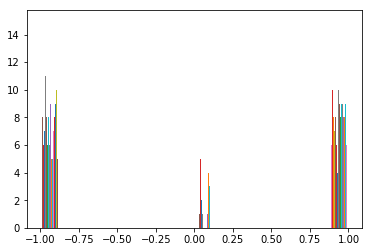

In [85]:
plt.hist(dem, bins=16);

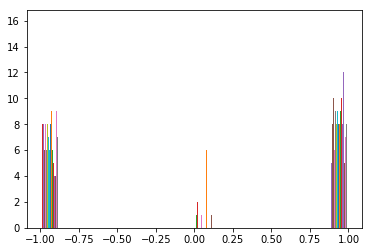

In [86]:
plt.hist(rep, bins=16);

In [0]:
import seaborn as sns

In [0]:
for i in series(1,16,1)
sns.kdeplot(dem['0'],color='r')